In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_date.csv');df.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [3]:
df.shape

(16775, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16775 entries, 0 to 16774
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       16775 non-null  object
 1   Country    16775 non-null  object
 2   Status     16775 non-null  object
 3   AQI Value  16775 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 524.3+ KB


In [5]:
df.Status.unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [6]:

# Converting data types
if not pd.api.types.is_datetime64_any_dtype(df['Date']):
    try:
      df['Date'] = pd.to_datetime(df['Date'])
    except KeyError:
      print("Warning: 'Date' column not found. Skipping datetime conversion.")
    except ValueError:
      print("Warning: Could not convert 'Date' column to datetime. Check data format.")

In [7]:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #handle unknown categories
encoded_status = encoder.fit_transform(df[['Status']])
encoded_df = pd.DataFrame(encoded_status, columns=encoder.get_feature_names_out(['Status']))
df = df.drop('Status', axis=1)
df = pd.concat([df, encoded_df], axis=1)

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
numerical_cols = df.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [9]:
df.head()

,Date,Country,AQI Value,Status_Good,Status_Hazardous,Status_Moderate,Status_Unhealthy,Status_Unhealthy for Sensitive Groups,Status_Very Unhealthy
0,2022-07-21,Albania,0.013514,1.0,0.0,0.0,0.0,0.0,0.0
1,2022-07-21,Algeria,0.066528,0.0,0.0,1.0,0.0,0.0,0.0
2,2022-07-21,Andorra,0.056133,0.0,0.0,1.0,0.0,0.0,0.0
3,2022-07-21,Angola,0.116424,0.0,0.0,0.0,0.0,1.0,0.0
4,2022-07-21,Argentina,0.064449,0.0,0.0,1.0,0.0,0.0,0.0


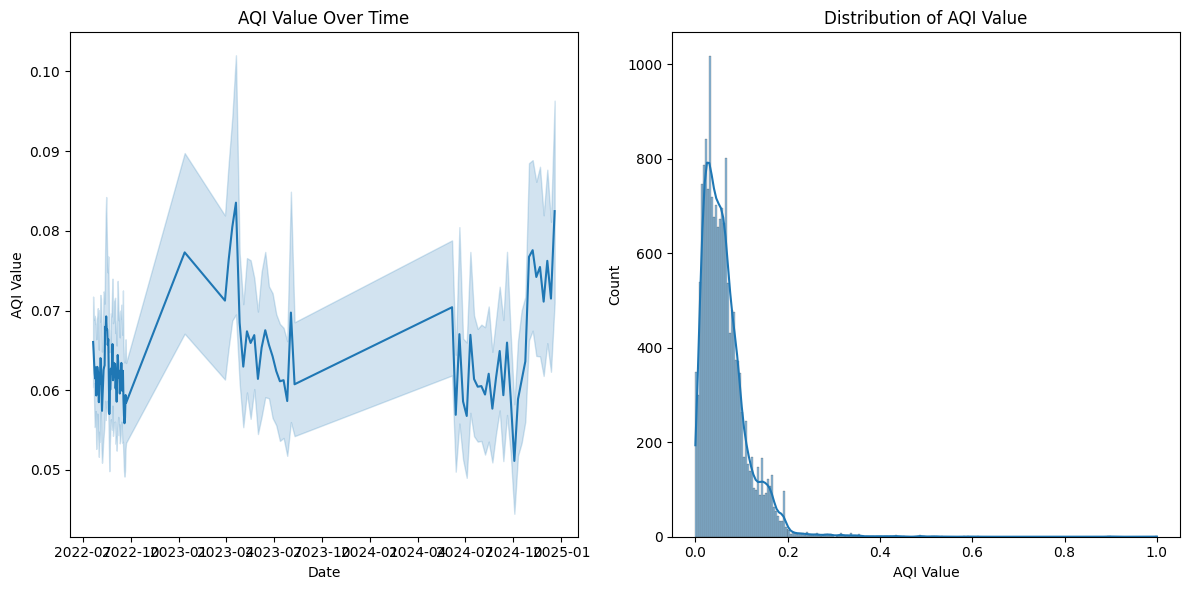

In [11]:
plt.figure(figsize=(12, 6))

# Subplot 1: Time Series Plot of AQI Value
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.lineplot(x='Date', y='AQI Value', data=df)
plt.title('AQI Value Over Time')

# Subplot 2: Distribution of AQI Value
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.histplot(df['AQI Value'], kde=True)
plt.title('Distribution of AQI Value')

plt.tight_layout()
plt.show()

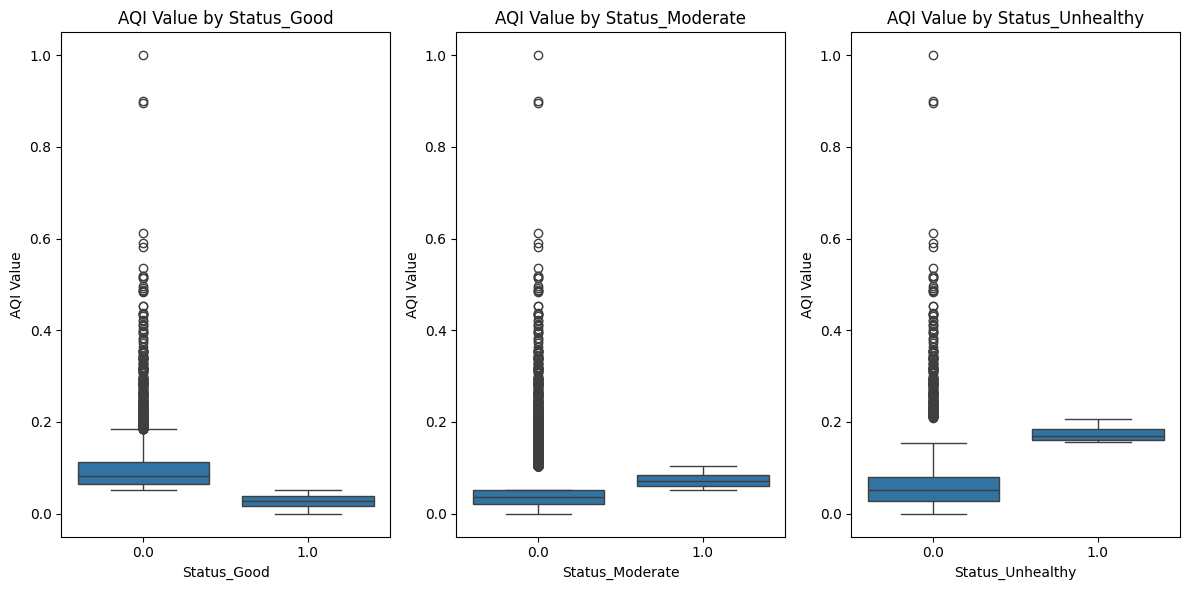

In [12]:

# 3. Box Plot of AQI Value by Status
plt.figure(figsize=(12, 6))

plt.subplot(1,3,1)
sns.boxplot(x='Status_Good', y='AQI Value', data=df)
plt.title('AQI Value by Status_Good')

plt.subplot(1,3,2)
sns.boxplot(x='Status_Moderate', y='AQI Value', data=df)
plt.title('AQI Value by Status_Moderate')

plt.subplot(1,3,3)
sns.boxplot(x='Status_Unhealthy', y='AQI Value', data=df)
plt.title('AQI Value by Status_Unhealthy')

plt.tight_layout()
plt.show()

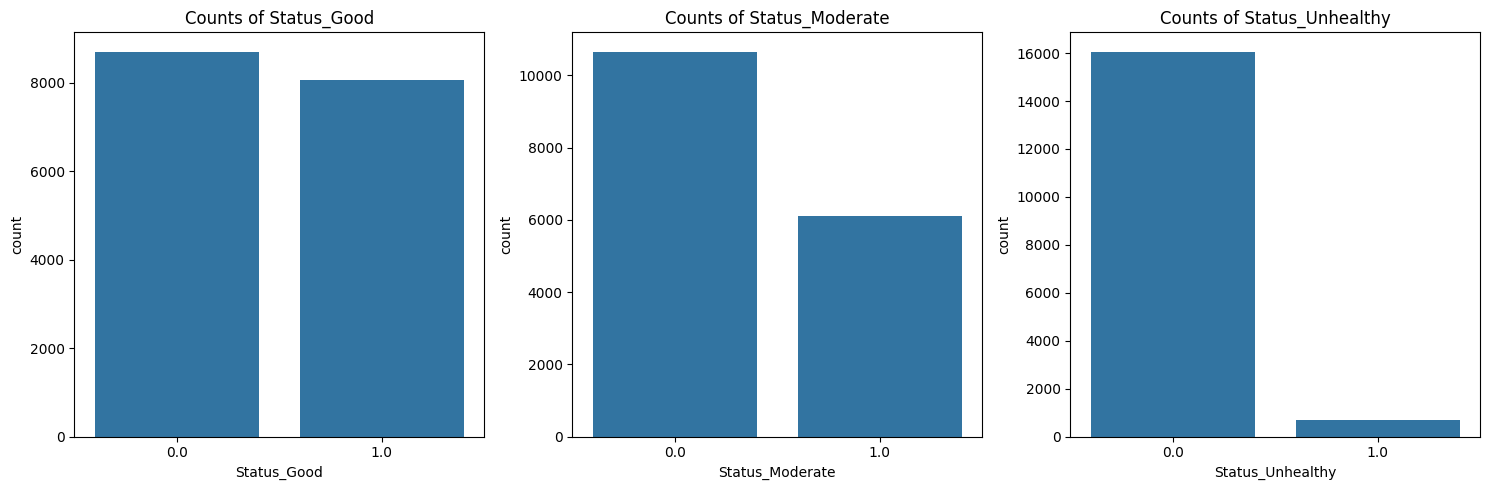

In [13]:
# prompt: # 4. Countplot of Status Categories
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Status_Good', data=df)
plt.title('Counts of Status_Good')

plt.subplot(1, 3, 2)
sns.countplot(x='Status_Moderate', data=df)
plt.title('Counts of Status_Moderate')

plt.subplot(1, 3, 3)
sns.countplot(x='Status_Unhealthy', data=df)
plt.title('Counts of Status_Unhealthy')

plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(df['Country'])

df['Country'] = label_encoder.transform(df['Country'])

print(df['Country'].nunique())

142


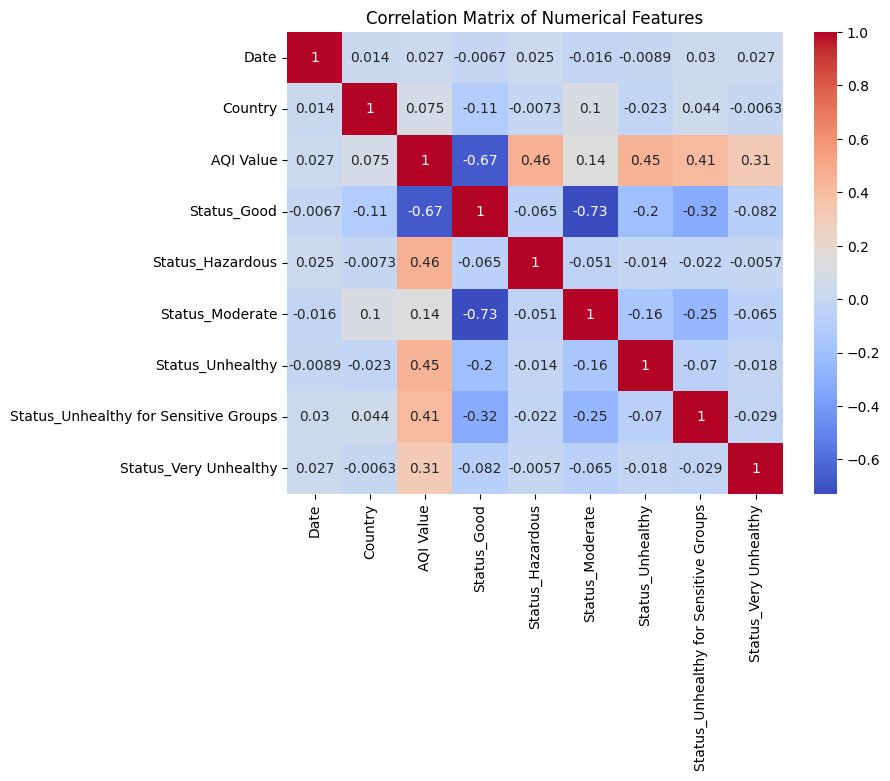

In [15]:
# 5. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Calculate correlation and plot
plt.title('Correlation Matrix of Numerical Features')
plt.show()

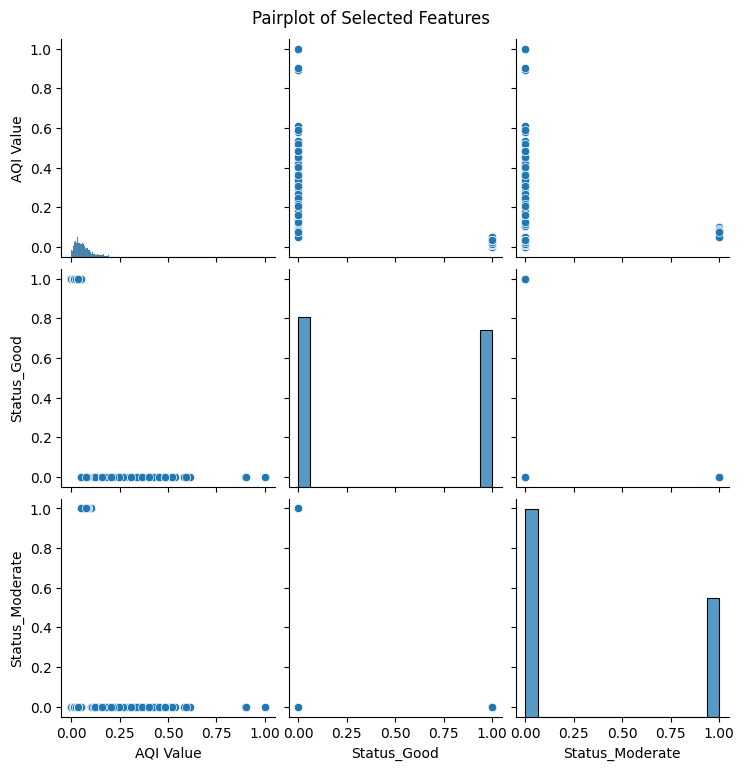

In [16]:
# 6. Pairplot of Selected Features
sns.pairplot(df[['AQI Value', 'Status_Good', 'Status_Moderate']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

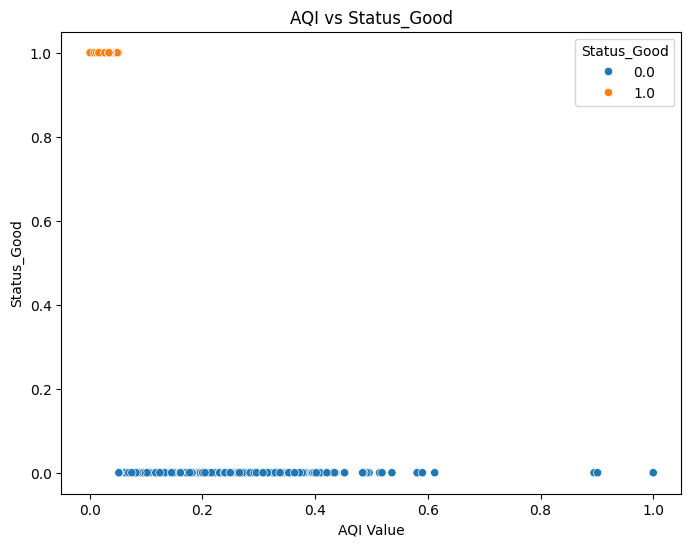

In [17]:
# 7. Scatter Plot of AQI vs. Status_Good
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AQI Value', y='Status_Good', data=df, hue='Status_Good')
plt.title('AQI vs Status_Good')
plt.show()

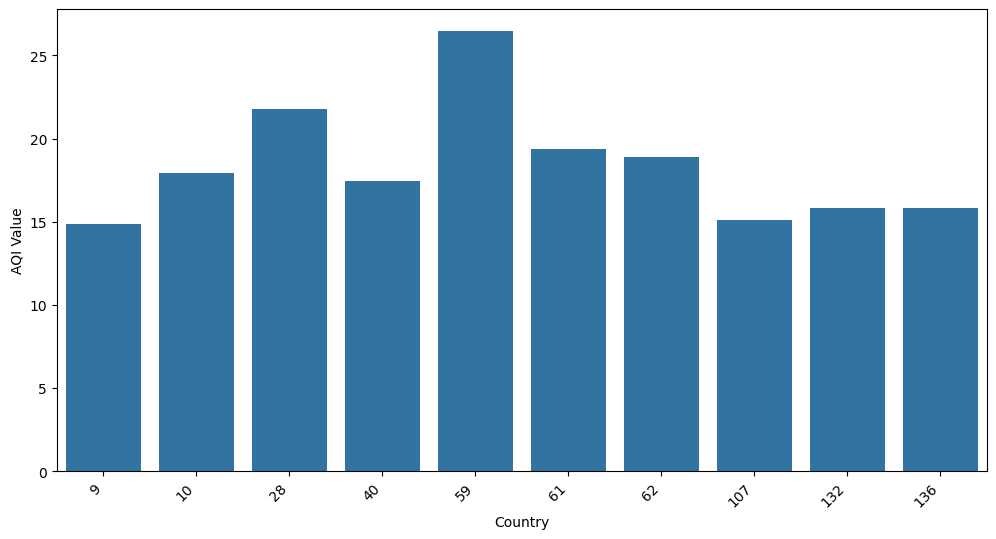

In [18]:

# 8.  Bar plot of average AQI per Country (top 10)

top_10_countries = df.groupby("Country")["AQI Value"].mean().sort_values(ascending=False).head(10).index
plt.figure(figsize=(12,6))
sns.barplot(x="Country", y="AQI Value", data=df[df["Country"].isin(top_10_countries)], ci=None, estimator=sum)
plt.xticks(rotation=45, ha="right")
plt.show()


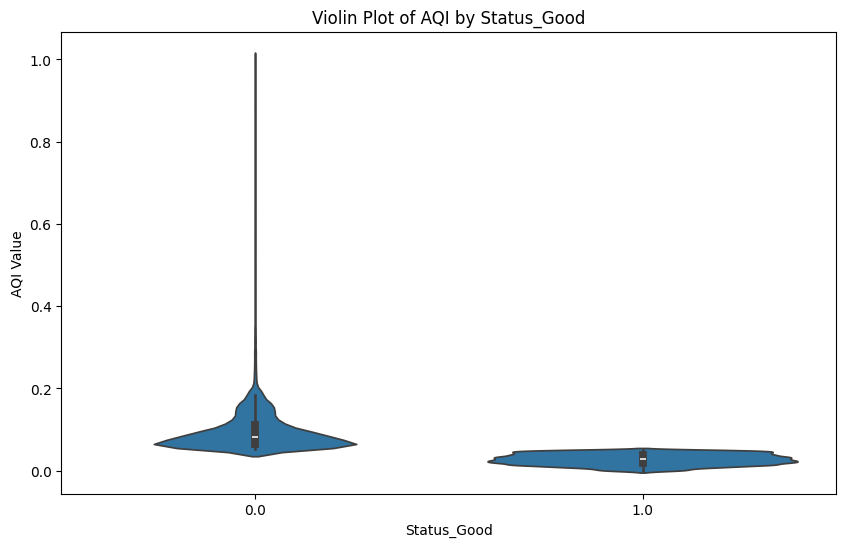

In [19]:
#9.  Violin Plot of AQI by Status_Good
plt.figure(figsize=(10, 6))
sns.violinplot(x='Status_Good', y='AQI Value', data=df)
plt.title('Violin Plot of AQI by Status_Good')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Prepare the data for modeling
X = df.drop(['AQI Value', 'Date'], axis=1)
y = df['AQI Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR()
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R-squared": r2}

In [24]:
# Find the best model based on R-squared
best_model = max(results, key=lambda k: results[k]['R-squared'])
print(f"The best model is {best_model} with R-squared: {results[best_model]['R-squared']:.4f} and MSE: {results[best_model]['MSE']:.4f}")

The best model is Decision Tree with R-squared: 0.9116 and MSE: 0.0003


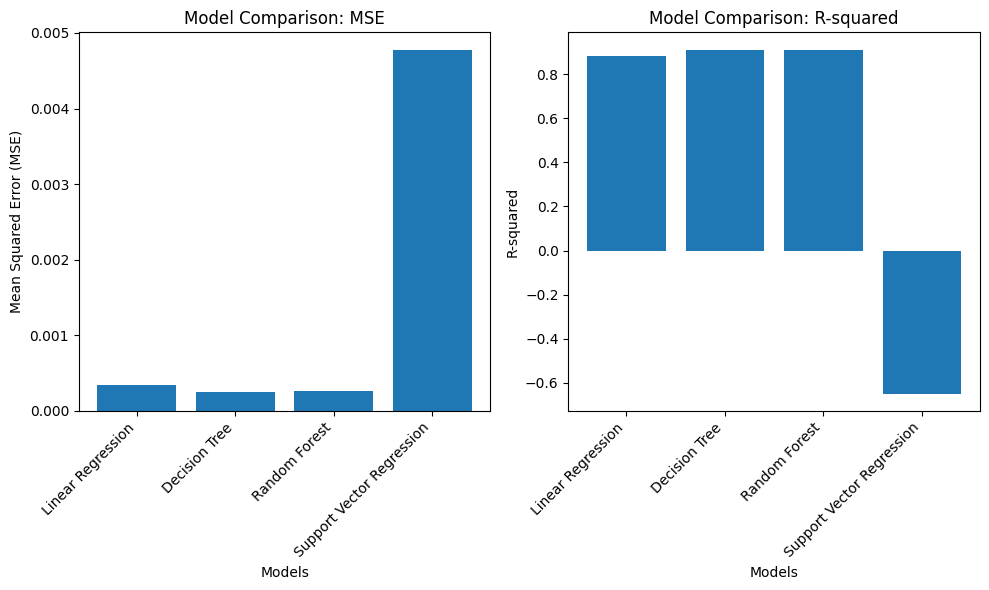

In [25]:
model_names = list(results.keys())
mse_values = [results[model]["MSE"] for model in model_names]
r2_values = [results[model]["R-squared"] for model in model_names]

plt.figure(figsize=(10, 6))

# Plot MSE values
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values)
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Comparison: MSE")
plt.xticks(rotation=45, ha="right")


# Plot R-squared values
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values)
plt.xlabel("Models")
plt.ylabel("R-squared")
plt.title("Model Comparison: R-squared")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [26]:
import joblib
best_model_name = "Random Forest"

# Save the best model
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [27]:
# Load the saved model
loaded_model = joblib.load('best_model.pkl')
# Sample data for prediction (replace with your actual data)
sample_data = pd.DataFrame(X_test.iloc[0]).T

# Make predictions
predictions = loaded_model.predict(sample_data)

print("Predictions:", predictions)

Predictions: [0.17407621]
